# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
from PIL import Image
import numpy as np
from fastai.vision.all import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%matplotlib inline

In [2]:
# Define the base paths
BASE_PATH = Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k')
INPUT_PATH = BASE_PATH/'images'
TARGET_PATH = BASE_PATH/'labels'

# Define the pixel2class dict
vocab_dict = {
    0: "road",
    1: "sidewalk",
    2: "building",
    3: "wall",
    4: "fence",
    5: "pole",
    6: "traffic light",
    7: "traffic sign",
    8: "vegetation",
    9: "terrain",
    10: "sky",
    11: "person",
    12: "rider",
    13: "car",
    14: "truck",
    15: "bus",
    16: "train",
    17: "motorcycle",
    18: "bicycle",
    19: "unknown"
}

In [3]:
INPUT_PATH.ls()

(#2) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train')]

In [4]:
(INPUT_PATH/'train').ls()

(#7000) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/509af2c2-8f8e0000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/3d0d454e-f0132c99.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/2e8bd85f-9d6c24d0.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/3fba086e-e20e66d9.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/5d1dd6e3-53c3171e.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/53d82b1f-2c2bfff8.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/2a11f70b-c201d138.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/1ba0e585-b880e61a.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/30296e67-4f3ad980.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/train/4dd07a28-0b8894c9.jpg')...]

In [5]:
(TARGET_PATH/'train').ls()

(#7001) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/6269a99b-c6343a27.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/13db8748-a4771ddd.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/6980d3f6-642fc320.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/90775bce-a0a1817a.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/1338c75c-91e30001.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/79f06acb-fa30703f.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/c9427dd5-8dd8e51f.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/127e2f8a-88f2ee39.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/5d9edbc9-d6572287.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/train/36a97b4c-ca10b532.png')...]

In [6]:
(INPUT_PATH/'valid').ls()

(#1000) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/981d9ee0-00000000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/a2297c18-876eb30b.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/a91b7555-00000405.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/97676d28-00000000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/a91b7555-00001010.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/9b970e47-51dde695.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/81a749be-2291617d.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/a91b7555-00000115.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/970da07f-00000000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/images/valid/a92b522c-507cecc4.jpg')...]

In [7]:
(TARGET_PATH/'valid').ls()

(#1000) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/9159d511-fb308249.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/99ebed9d-b6dd1203.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/a5392d4c-00000000.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/999cd7bc-4ddb4a05.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/8ffdafe7-6a45ea3a.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/a91b7555-00000275.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/8b5e9cbe-9acc0000.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/a91b7555-00001085.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/8a783082-a6ffa735.png'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/labels/valid/8b28251d-4bdd62a8.png')...]

# Training U-NET model

In [9]:
def find_unique_classes_in_masks(mask_dir):
    unique_classes = set()
    for mask_path in mask_dir.iterdir():
        if mask_path.is_file() and mask_path.suffix in ['.png', '.jpg']:  # Ensure it's an image file
            mask = np.array(Image.open(mask_path))
            unique_classes.update(np.unique(mask))
    return unique_classes

In [13]:
# Define the directory containing your validation masks
mask_dir = TARGET_PATH/'valid'

# Find unique classes
unique_classes = find_unique_classes_in_masks(mask_dir)

print(f"Unique classes found: {sorted(unique_classes)}")
print(f"Total number of unique classes: {len(unique_classes)}")
assert(len(unique_classes) == len(vocab_dict))

Unique classes found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 255]
Total number of unique classes: 20


In [11]:
# Define the directory containing your validation masks
mask_dir = TARGET_PATH/'train'

# Find unique classes
unique_classes = find_unique_classes_in_masks(mask_dir)

print(f"Unique classes found: {sorted(unique_classes)}")
print(f"Total number of unique classes: {len(unique_classes)}")
assert(len(unique_classes) == len(vocab_dict))

Unique classes found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 255]
Total number of unique classes: 20


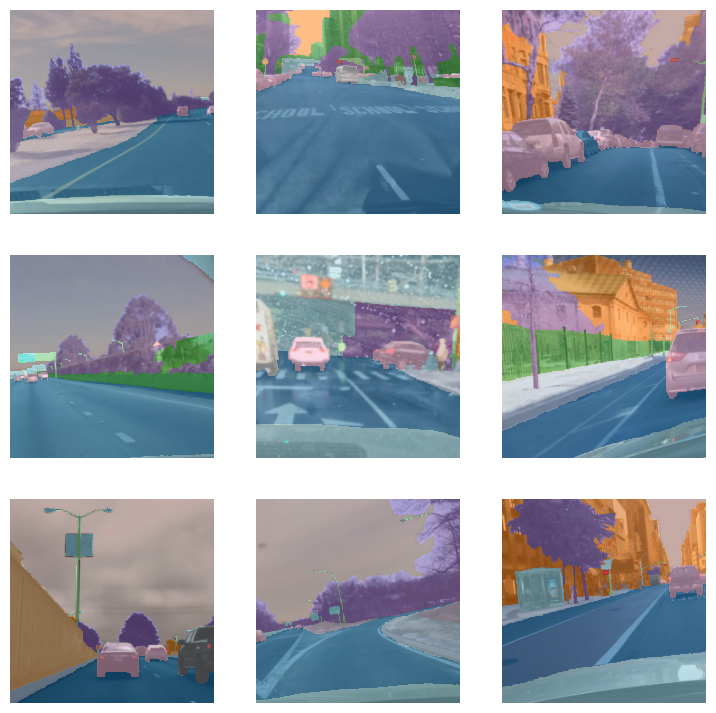

In [20]:
def get_adjusted_mask_file_path(x):
    """
    Given an input image path, returns the corresponding mask with values adjusted.
    All 255 values in the mask are changed to 19.
    This is required to make sure that all the values in our mask are continuous starting from 0...19,
    Otherwise the training in PyTorch fails.
    
    Args:
    - x (Pathlib.Path): Path to the input image file.
    
    Returns:
    - PIL.Image: The adjusted mask image.
    """
    mask_path = TARGET_PATH/x.relative_to(INPUT_PATH).with_suffix('.png')
    mask = np.array(Image.open(mask_path))
    mask[mask == 255] = 19
    
    # Return the adjusted mask as a PIL Image for compatibility with FastAI
    return Image.fromarray(mask)

def custom_splitter(file_path):
    """Custom splitter for DataBlock to separate training and validation datasets based on folder structure."""
    is_valid = 'valid' in str(file_path)
    return is_valid

# Load the DataBlock
segmentation_datablock = DataBlock(blocks=(ImageBlock, MaskBlock(codes=None)), # codes are the classes for segmentation
                                   get_items=get_image_files, 
                                   splitter=FuncSplitter(custom_splitter),
                                   get_y=get_adjusted_mask_file_path,
                                   item_tfms=Resize(460),
                                   batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

# Load the DataLoaders
dls = segmentation_datablock.dataloaders(INPUT_PATH, path=BASE_PATH, bs = 16)

dls.show_batch()

In [21]:
dls.train_ds

(#7000) [(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720)...]

In [22]:
dls.valid_ds

(#1000) [(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720),(PILImage mode=RGB size=1280x720, PILMask mode=L size=1280x720)...]

In [13]:
learn = unet_learner(dls, resnet34, n_out=len(unique_classes))

Choosing a good learning rate

For a more intuitive explanation, please check out [Sylvain Gugger's post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

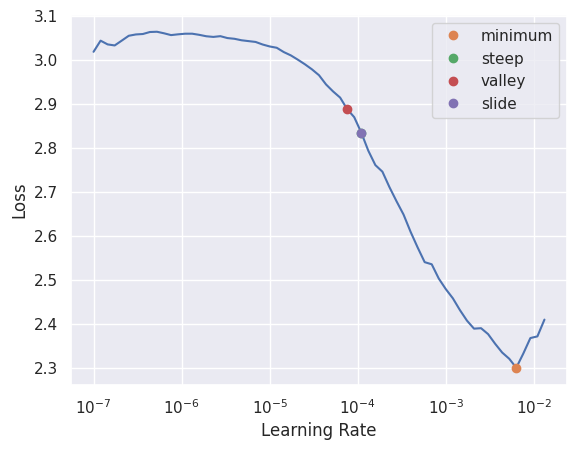

In [14]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [15]:
lrs.valley

7.585775892948732e-05

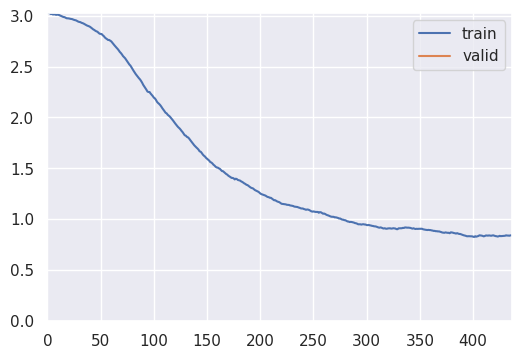

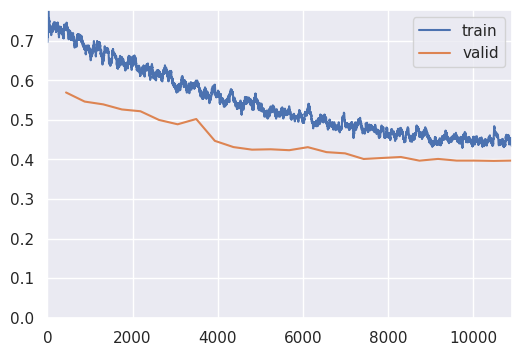

In [16]:
learn.fine_tune(25, base_lr = lrs.valley, cbs=[ShowGraphCallback(), CSVLogger(fname='log.csv')])

# Visualizations of the predictions

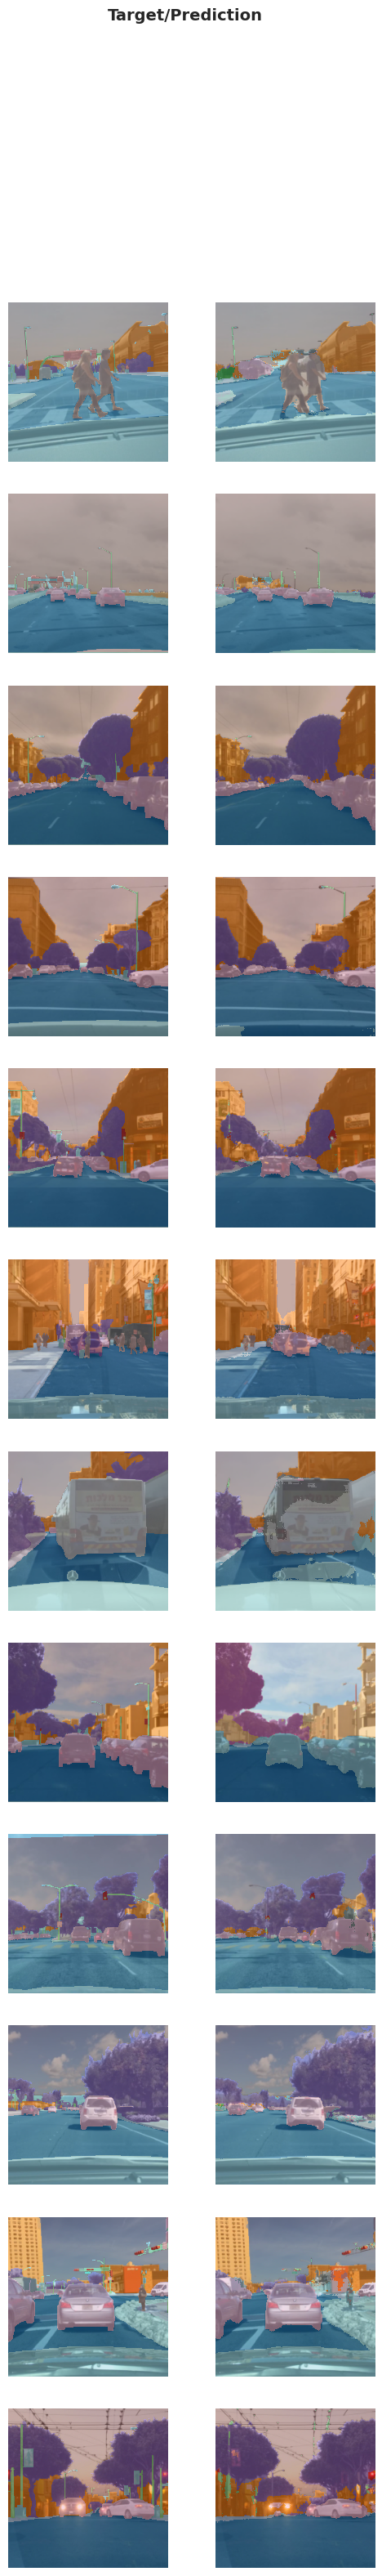

In [31]:
learn.show_results(dl=dls.valid, max_n=12)

In [62]:
%%time
inputs, preds, targets, decoded_preds = learn.get_preds(dl=dls.valid, with_input=True, with_decoded = True)

CPU times: user 36.3 s, sys: 20.3 s, total: 56.5 s
Wall time: 35.5 s


We could easily do something similar on our own

In [57]:
import matplotlib.pyplot as plt
import torch

def insert_line_breaks(text, max_chars_per_line=30):
    words = text.split(', ')
    lines = []
    current_line = ''
    for word in words:
        if len(current_line) + len(word) + 2 > max_chars_per_line:
            lines.append(current_line)
            current_line = word
        else:
            if current_line:
                current_line += ', ' + word
            else:
                current_line = word
    lines.append(current_line)  # add the last line
    return '\n'.join(lines)

def denormalized_image(img):
    img = img.float()
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    if torch.min(img) < 0:
        img = img * std + mean  # Denormalize
    img = img.permute(1, 2, 0)  # Rearrange channels for plotting
    img = img.clamp(0, 1)  # Clamp values to ensure they are within [0, 1] range
    return img

def get_classes_from_mask(mask, vocab_dict):
    unique_classes = torch.unique(mask).tolist()
    class_names = [vocab_dict[c] for c in unique_classes if c in vocab_dict]
    return ', '.join(class_names)

def visualize_segmentation_batch(inputs, true_masks=None, pred_masks=None, vocab_dict=None, num_imgs=3):
    num_imgs = min(num_imgs, len(inputs))
    cols = 2 if true_masks is None else 3
    fig, axes = plt.subplots(num_imgs, cols, figsize=(20, 5*num_imgs), squeeze=False)

    for i in range(num_imgs):
        input_image = denormalized_image(inputs[i])
        
        ax0 = axes[i][0]
        ax0.imshow(input_image)
        ax0.set_title('Input Image')
        ax0.axis('off')

        # Show true mask if provided
        if true_masks is not None:
            ax1 = axes[i][1]
            true_mask = true_masks[i]
            ax1.imshow(true_mask, cmap='jet', interpolation='nearest')
            true_objects = get_classes_from_mask(true_mask, vocab_dict)
            ax1.set_title(f'True Mask\n{insert_line_breaks(true_objects)}')
            ax1.axis('off')

        # Show predicted mask if provided
        if pred_masks is not None:
            ax_pred = axes[i][1] if true_masks is None else axes[i][2]
            pred_mask = pred_masks[i]
            ax_pred.imshow(pred_mask, cmap='jet', interpolation='nearest')
            predicted_objects = get_classes_from_mask(pred_mask, vocab_dict)
            ax_pred.set_title(f'Predicted Mask\n{insert_line_breaks(predicted_objects)}')
            ax_pred.axis('off')

    plt.tight_layout()
    plt.show()

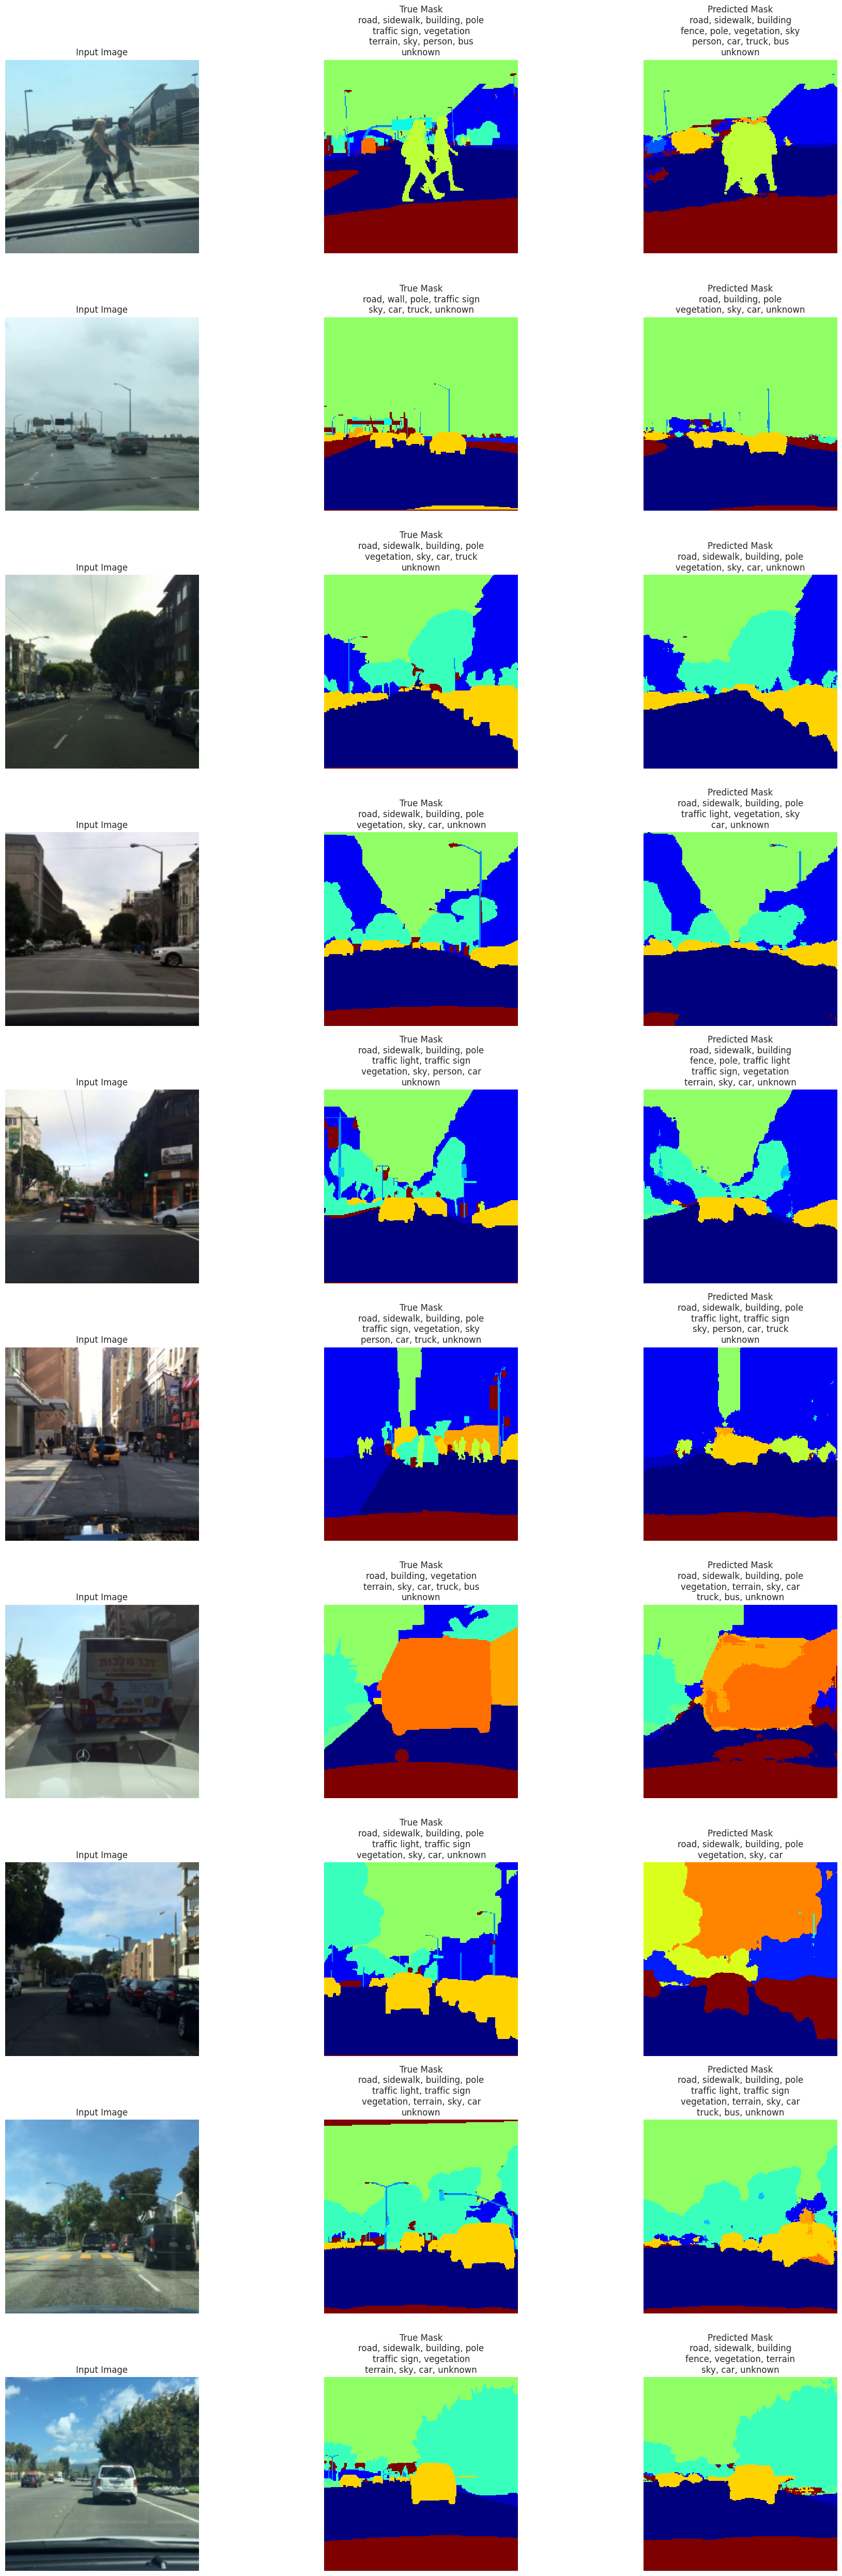

In [63]:
visualize_segmentation_batch(inputs, targets, decoded_preds, vocab_dict=vocab_dict, num_imgs=10)

# Evaluation and conclusions

In [64]:
import numpy as np
import pandas as pd
import torch

def iou(preds, targs, num_classes=20):
    # Calculate Intersection over Union (IoU) for each class
    ious = []
    preds = preds.view(-1)
    targs = targs.view(-1)

    for cls in range(num_classes):  # Exclude the last class ('unknown')
        pred_inds = preds == cls
        target_inds = targs == cls
        intersection = (pred_inds[target_inds]).long().sum().item()  # True positives
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection
        if union > 0:
            ious.append((cls, float(intersection) / float(max(union, 1))))
        else:
            ious.append((cls, float('nan')))
    return ious

def precision_recall(preds, targs, num_classes=20):
    # Calculate precision and recall for each class
    precisions = []
    recalls = []
    preds = preds.view(-1)
    targs = targs.view(-1)

    for cls in range(num_classes):
        pred_inds = preds == cls
        target_inds = targs == cls
        tp = (pred_inds[target_inds]).long().sum().item()  # True positives
        fp = (pred_inds[~target_inds]).long().sum().item()  # False positives
        fn = (~pred_inds[target_inds]).long().sum().item()  # False negatives

        precision = tp / (tp + fp) if (tp + fp) > 0 else float('nan')
        recall = tp / (tp + fn) if (tp + fn) > 0 else float('nan')

        precisions.append((cls, precision))
        recalls.append((cls, recall))

    return precisions, recalls

def accuracy(preds, targs):
    preds = preds.view(-1)
    targs = targs.view(-1)
    correct = (preds == targs).float().sum()
    return correct / preds.shape[0]

def evaluate_segmentation_model(preds, targs, vocab_dict):
    num_classes = len(vocab_dict)
    ious = iou(preds, targs, num_classes)
    precisions, recalls = precision_recall(preds, targs, num_classes)
    acc = accuracy(preds, targs).item()

    # Ensure targs is of integer type before calling bincount
    targs_int = targs.view(-1).long()  # Cast targs to long to use with bincount
    class_frequencies = targs_int.bincount(minlength=num_classes)
    total_pixels = class_frequencies.sum().item()
    class_percentages = (class_frequencies / total_pixels * 100).tolist()

    # Compile metrics into a DataFrame for neat presentation
    metrics = []
    for cls in range(num_classes):
        class_name = vocab_dict[cls]
        metrics.append({
            'Class': class_name,
            'IoU': ious[cls][1],
            'Precision': precisions[cls][1],
            'Recall': recalls[cls][1],
            'Percentage (%)': class_percentages[cls]
        })

    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Class', inplace=True)
    print(f"Overall Accuracy: {acc:.4f}")
    return metrics_df

In [65]:
evaluation_df = evaluate_segmentation_model(decoded_preds, targets, vocab_dict)
evaluation_df

Overall Accuracy: 0.8813


IoU  Precision    Recall  Percentage (%)
Class                                                       
road           0.878462   0.927387  0.943347       23.293238
sidewalk       0.415774   0.650433  0.535413        1.481834
building       0.706834   0.790144  0.870196       11.132021
wall           0.158007   0.649892  0.172708        0.236354
fence          0.311925   0.539896  0.424866        0.572463
pole           0.188496   0.507120  0.230774        0.935314
traffic light  0.273258   0.542796  0.354958        0.134309
traffic sign   0.106976   0.270516  0.150347        0.196943
vegetation     0.792135   0.876856  0.891287       15.084064
terrain        0.345341   0.577960  0.461795        0.561222
sky            0.932315   0.963498  0.966450       21.888142
person         0.347301   0.578046  0.465250        0.212604
rider          0.000000        NaN  0.000000        0.008056
car            0.816754   0.867302  0.933394        9.180136
truck          0.355301   0.677367  0.427677        1.020390
bus            0.566124   0.753093  0.695149        0.643395
train          0.000000        NaN  0.000000        0.017813
motorcycle     0.000000        NaN  0.000000        0.015384
bicycle        0.000000        NaN  0.000000        0.015450
unknown        0.696646   0.844083  0.799532       13.370869

The main conclusion from the graph is that there appears to be a correlation between the IoU scores of the classes and their respective occurrence percentages in the dataset. This suggests that the model tends to perform better on classes that are more prevalent in the dataset. Given this relationship, it may be beneficial to acquire more balanced data for underrepresented classes, as increasing their representation could potentially lead to improved IoU scores and overall model performance on those classes.

In short, not surprisingly, more data -> better performance (:

In [66]:
import matplotlib.pyplot as plt

def plot_class_iou_vs_percentage_sorted(df):
    # Sort the DataFrame by IoU for plotting
    sorted_df = df.sort_values(by='IoU', ascending=True)
    
    classes = sorted_df.index.tolist()
    ious = sorted_df['IoU'].tolist()
    percentages = sorted_df['Percentage (%)'].tolist()
    
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    ax1.bar(classes, ious, color='b', alpha=0.6, label='IoU')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('IoU', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    plt.xticks(rotation='vertical')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(classes, percentages, color='r', marker='o', linestyle='-', label='Percentage (%)')
    ax2.set_ylabel('Percentage (%)', color='r')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='r')

    fig.tight_layout()  # to make sure layout does not overlap
    plt.title('Class IoU vs Percentage Occurrence (Sorted by IoU)')
    plt.show()

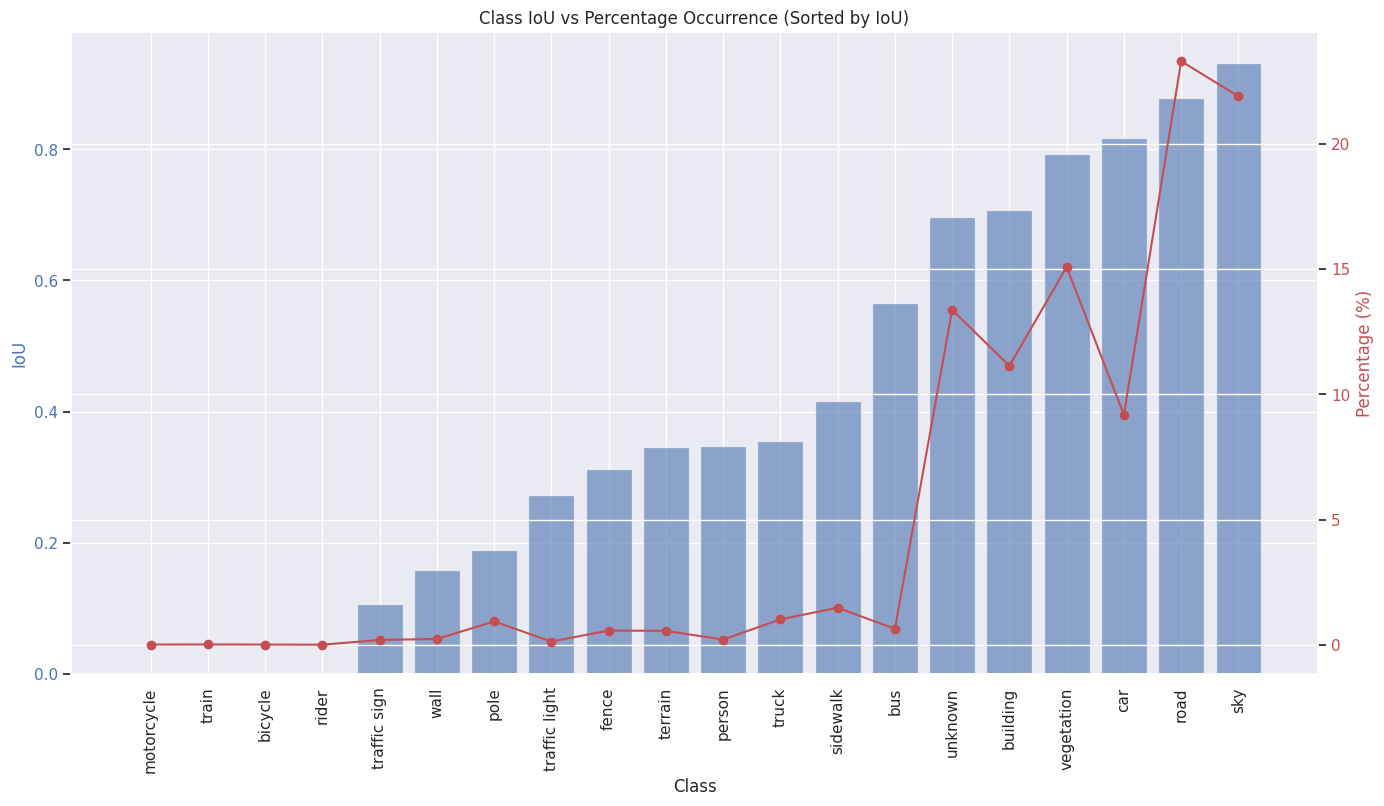

In [67]:
plot_class_iou_vs_percentage_sorted(evaluation_df)

Now, let's calculate the Spearman Rank Correlation between the IoU scores and the percentage occurrences to quantify this correlation. The Spearman correlation assesses how well the relationship between two variables can be described using a monotonic function.

In [68]:
spearman_corr = evaluation_df['IoU'].corr(evaluation_df['Percentage (%)'], method='spearman')
spearman_corr

0.932836830474556

Given that you've mentioned a calculated Spearman Rank Correlation of approximately 0.933, this would suggest a very strong positive correlation between the percentage of data representation for a class and its IoU score. Such a high correlation coefficient supports the conclusion that enhancing the representation of underrepresented classes could be beneficial for the model's segmentation accuracy.







# Using the model as a classification model


In [51]:
from sklearn.metrics import classification_report
import numpy as np

def mask_to_class_labels(mask, num_classes):
    # Convert a segmentation mask to class labels
    return [1 if i in mask else 0 for i in range(num_classes)]

def calculate_classification_metrics(true_masks, pred_masks, num_classes):
    # Initialize lists to store class labels for all images
    true_labels = []
    pred_labels = []
    
    # Convert masks to class labels
    for i in range(len(true_masks)):
        true_labels.append(mask_to_class_labels(true_masks[i], num_classes))
        pred_labels.append(mask_to_class_labels(pred_masks[i], num_classes))
    
    # Convert lists to numpy arrays for sklearn metrics
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)
    print(f"Overall Accuracy: {accuracy_score(torch.tensor(true_labels).view(-1), torch.tensor(pred_labels).view(-1)):.4f}")
    # Calculate metrics
    report = classification_report(true_labels, pred_labels, target_names=list(vocab_dict.values()), zero_division=0)
    return report, true_labels, pred_labels

def plot_confusion_matrix(true_labels, pred_labels, vocab_dict):
    num_classes = len(vocab_dict)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    # Calculate confusion matrix
    for i in range(num_classes):
        for j in range(true_labels.shape[0]):
            if true_labels[j, i] == 1:
                if pred_labels[j, i] == 1:
                    confusion_matrix[i, i] += 1  # True positive
                else:
                    for k in range(num_classes):
                        if pred_labels[j, k] == 1:
                            confusion_matrix[i, k] += 1  # False negative/False positive
            else:
                if pred_labels[j, i] == 1:
                    confusion_matrix[i, i] += 1  # Increment for false positive
    
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13, 10))
    cax = ax.matshow(confusion_matrix, cmap='Blues')
    fig.colorbar(cax)
    
    # Hide the grid lines
    ax.grid(False)
    
    # Annotate each cell with the numeric value
    for (i, j), val in np.ndenumerate(confusion_matrix):
        ax.text(j, i, f'{val}', va='center', ha='center')
    
    # Label the axes
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    ax.set_xticklabels([vocab_dict[i] for i in range(num_classes)], rotation=90)
    ax.set_yticklabels([vocab_dict[i] for i in range(num_classes)])
    
    # Label axes
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix | Classification')
    
    plt.show()

In [52]:
report, true_labels, pred_labels = calculate_classification_metrics(targets, decoded_preds, num_classes=len(vocab_dict))
print(report)

Overall Accuracy: 0.8715
               precision    recall  f1-score   support

         road       0.98      1.00      0.99       984
     sidewalk       0.79      0.93      0.85       673
     building       0.92      0.98      0.95       863
         wall       0.29      0.34      0.32        96
        fence       0.33      0.61      0.43       203
         pole       0.97      0.90      0.93       931
traffic light       0.81      0.74      0.77       503
 traffic sign       0.83      0.59      0.69       690
   vegetation       0.97      0.98      0.97       948
      terrain       0.61      0.76      0.68       323
          sky       0.98      1.00      0.99       964
       person       0.69      0.58      0.63       315
        rider       0.00      0.00      0.00        27
          car       0.98      1.00      0.99       962
        truck       0.51      0.50      0.50       283
          bus       0.47      0.44      0.45       124
        train       0.00      0.00     

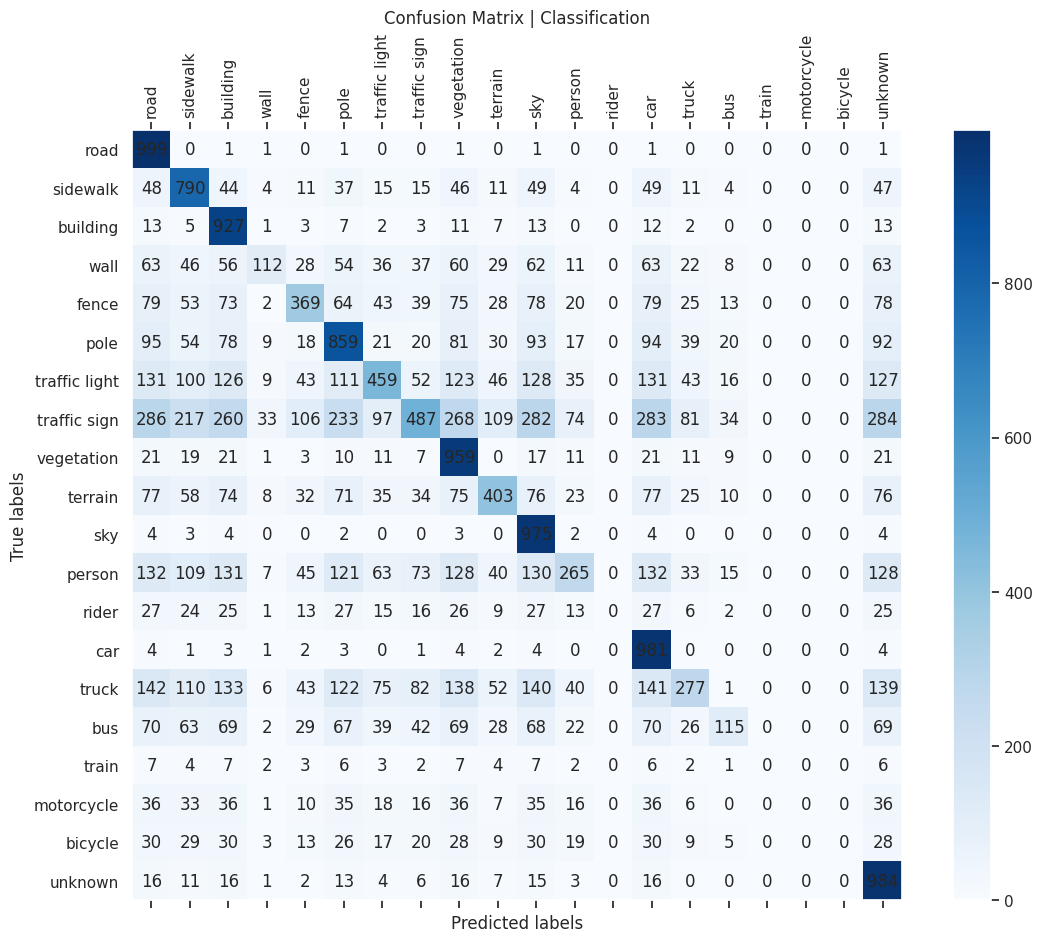

In [53]:
plot_confusion_matrix(true_labels, pred_labels, vocab_dict)

# Prediction on the test set

In [92]:
test_path = BASE_PATH/'test'

In [93]:
test_path.ls()

(#2000) [Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/dc15a645-a4751ede.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/d7a62a80-4abe6d10.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/d66de21c-aa6df3d8.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/cf0581f9-00000000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/afd0aabb-caf615d5.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/d6f47fb4-ce04eec6.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/ed57d93e-4f363b63.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/d8ebe746-00000000.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/e9390b2c-27830687.jpg'),Path('/dsp/dsp_gpu_portal/sys/opfiles/Roni/bdd100k/test/e837affe-75b823d6.jpg')...]

In [99]:
dl = learn.dls.test_dl(test_path.ls(), num_workers=0)
inputs, preds, _, decoded_preds = learn.get_preds(dl=dl, with_input=True, with_decoded = True)

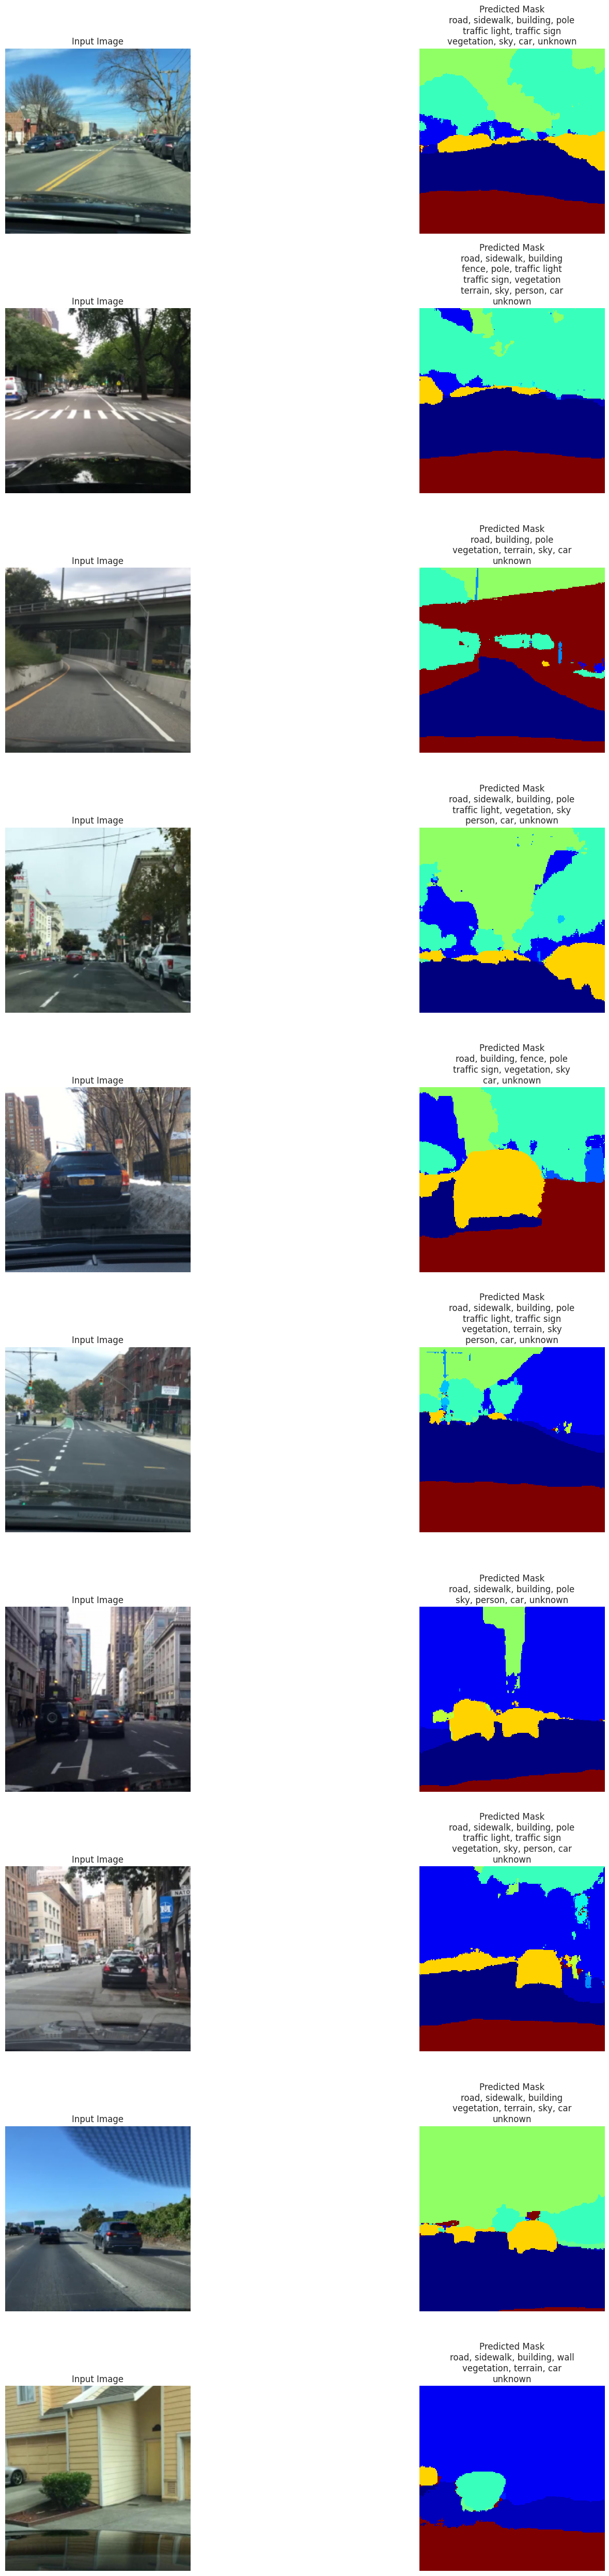

In [112]:
visualize_segmentation_batch(inputs, true_masks=None, pred_masks=decoded_preds, vocab_dict=vocab_dict, num_imgs=10)

# FocalLoss ClassWeights &  - to deal with the unbalanced classes

We will try to deal with the data imbalance problem and revive the degenerate classes

We will try to use the heavy ammunition (:

- We will change the loss function to [Focal Loss](https://paperswithcode.com/method/focal-loss#:~:text=Focal%20loss%20applies%20a%20modulating,in%20the%20correct%20class%20increases.)

- We will add [Class Weights](https://paperswithcode.com/method/focal-loss#:~:text=Focal%20loss%20applies%20a%20modulating,in%20the%20correct%20class%20increases.)

In [26]:
def calculate_class_weights(class_percentages, adjust_factor=1.0):
    """
    Calculate class weights from class percentages to balance the FocalLoss, 
    with an added power factor to adjust the balance effect.

    Args:
    - class_percentages (list or array): The percentage of each class in the dataset.
    - adjust_factor (float): A factor between 0 and 1 to adjust the balance effect. 
      1 means full balancing effect, 0 means no balancing effect.

    Returns:
    - Tensor: A tensor of class weights for balancing the FocalLoss.
    """
    # Convert the class percentages to a tensor
    percentages = torch.tensor(class_percentages, dtype=torch.float32)
    
    # Calculate the inverse of the percentages
    inverse_ratios = 1.0 / percentages
    
    # Normalize the weights to sum up to the number of classes
    normalized_weights = len(class_percentages) * inverse_ratios / inverse_ratios.sum()
    
    # Equal weights (no balancing effect)
    equal_weights = torch.ones_like(percentages)
    
    # Adjust the weights based on the power factor
    adjusted_weights = (equal_weights * (1 - adjust_factor)) + (normalized_weights * adjust_factor)
    
    return adjusted_weights

Calculate the ratio between the classes and weaken it by half to give weight to the real ratios as well:

In [35]:
class_weights = calculate_class_weights(evaluation_df['Percentage (%)'].values, adjust_factor = 0.5).to(device)
class_weights

tensor([0.5013, 0.5199, 0.5026, 0.6246, 0.5514, 0.5315, 0.7192, 0.6495, 0.5020,
        0.5525, 0.5013, 0.6385, 4.1543, 0.5032, 0.5288, 0.5458, 2.1526, 2.4136,
        2.4054, 0.5022], device='cuda:0')

In [36]:
learn = unet_learner(
    dls,
    resnet34, 
    n_out=len(unique_classes), 
    loss_func = FocalLoss(gamma = 3.0, weight = class_weights)
)

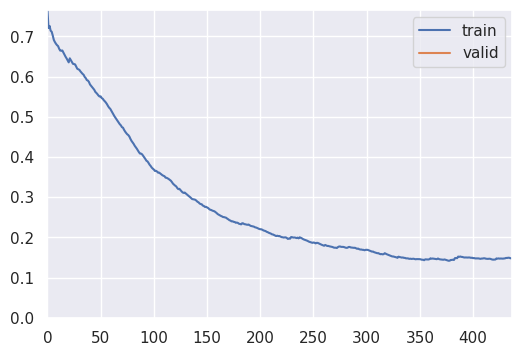

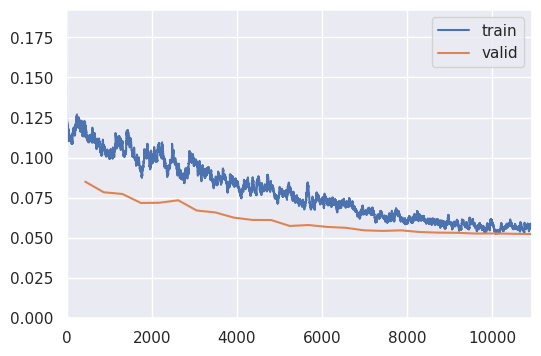

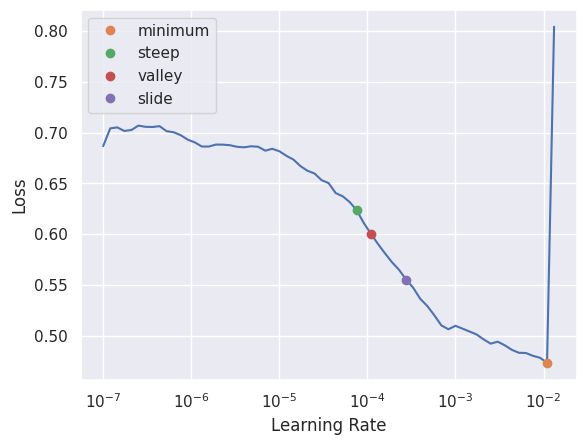

In [37]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
learn.fine_tune(25, base_lr = lrs.valley, cbs=[ShowGraphCallback(), CSVLogger(fname='log.csv')])

In [38]:
%%time
inputs, preds, targets, decoded_preds = learn.get_preds(dl=dls.valid, with_input=True, with_decoded = True)

CPU times: user 7.5 s, sys: 28.2 s, total: 35.7 s
Wall time: 47.3 s


In [49]:
evaluation_df = evaluate_segmentation_model(torch.argmax(preds, dim=1), targets, vocab_dict)
evaluation_df

Overall Accuracy: 0.8679


IoU  Precision    Recall  Percentage (%)
Class                                                       
road           0.861088   0.913605  0.937421       23.293238
sidewalk       0.360497   0.586721  0.483194        1.481834
building       0.690635   0.792245  0.843379       11.132021
wall           0.157221   0.361325  0.217728        0.236354
fence          0.268419   0.422888  0.423581        0.572463
pole           0.200439   0.458158  0.262715        0.935314
traffic light  0.301754   0.432155  0.500007        0.134309
traffic sign   0.127367   0.214190  0.239086        0.196943
vegetation     0.778981   0.871242  0.880327       15.084064
terrain        0.331254   0.489851  0.505716        0.561222
sky            0.927889   0.960869  0.964330       21.888142
person         0.284501   0.497055  0.399509        0.212604
rider          0.019467   0.022273  0.133845        0.008056
car            0.803404   0.862821  0.921052        9.180136
truck          0.282437   0.489066  0.400657        1.020390
bus            0.401853   0.743604  0.466490        0.643395
train          0.000000        NaN  0.000000        0.017813
motorcycle     0.062312   0.081140  0.211685        0.015384
bicycle        0.049538   0.062550  0.192337        0.015450
unknown        0.668152   0.837096  0.768013       13.370869

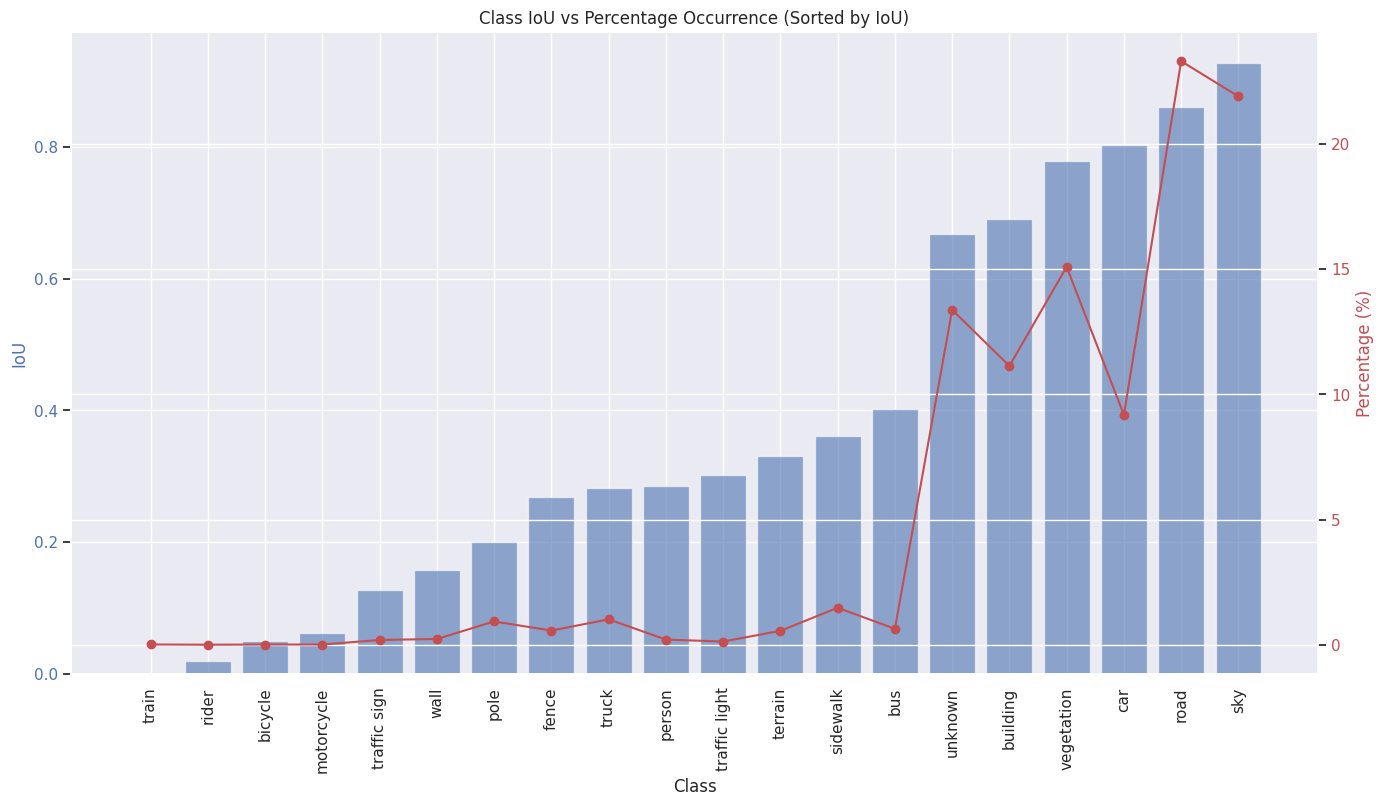

In [ ]:
plot_class_iou_vs_percentage_sorted(evaluation_df)

It can be seen that out of the four degenerate classes, three are no longer degenerate, but their performance is not good.

In [52]:
report, true_labels, pred_labels = calculate_classification_metrics(targets, torch.argmax(preds, dim=1), num_classes=len(vocab_dict))
print(report)

Overall Accuracy: 0.8359
               precision    recall  f1-score   support

         road       0.98      1.00      0.99       984
     sidewalk       0.79      0.94      0.86       673
     building       0.89      0.99      0.94       863
         wall       0.19      0.53      0.28        96
        fence       0.28      0.74      0.40       203
         pole       0.97      0.91      0.94       931
traffic light       0.76      0.84      0.80       503
 traffic sign       0.79      0.72      0.75       690
   vegetation       0.96      0.98      0.97       948
      terrain       0.54      0.82      0.65       323
          sky       0.97      1.00      0.99       964
       person       0.59      0.67      0.62       315
        rider       0.07      0.44      0.12        27
          car       0.98      1.00      0.99       962
        truck       0.44      0.51      0.47       283
          bus       0.37      0.49      0.42       124
        train       0.00      0.00     

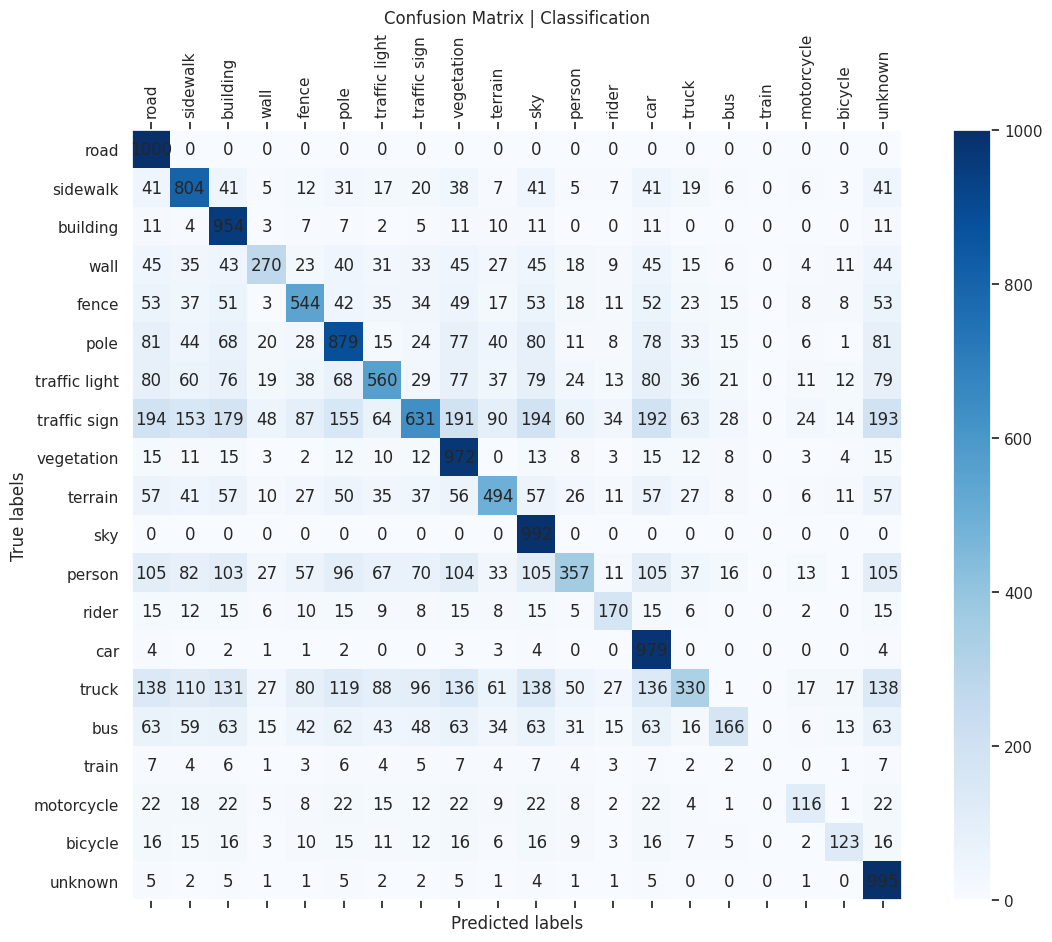

In [53]:
plot_confusion_matrix(true_labels, pred_labels, vocab_dict)

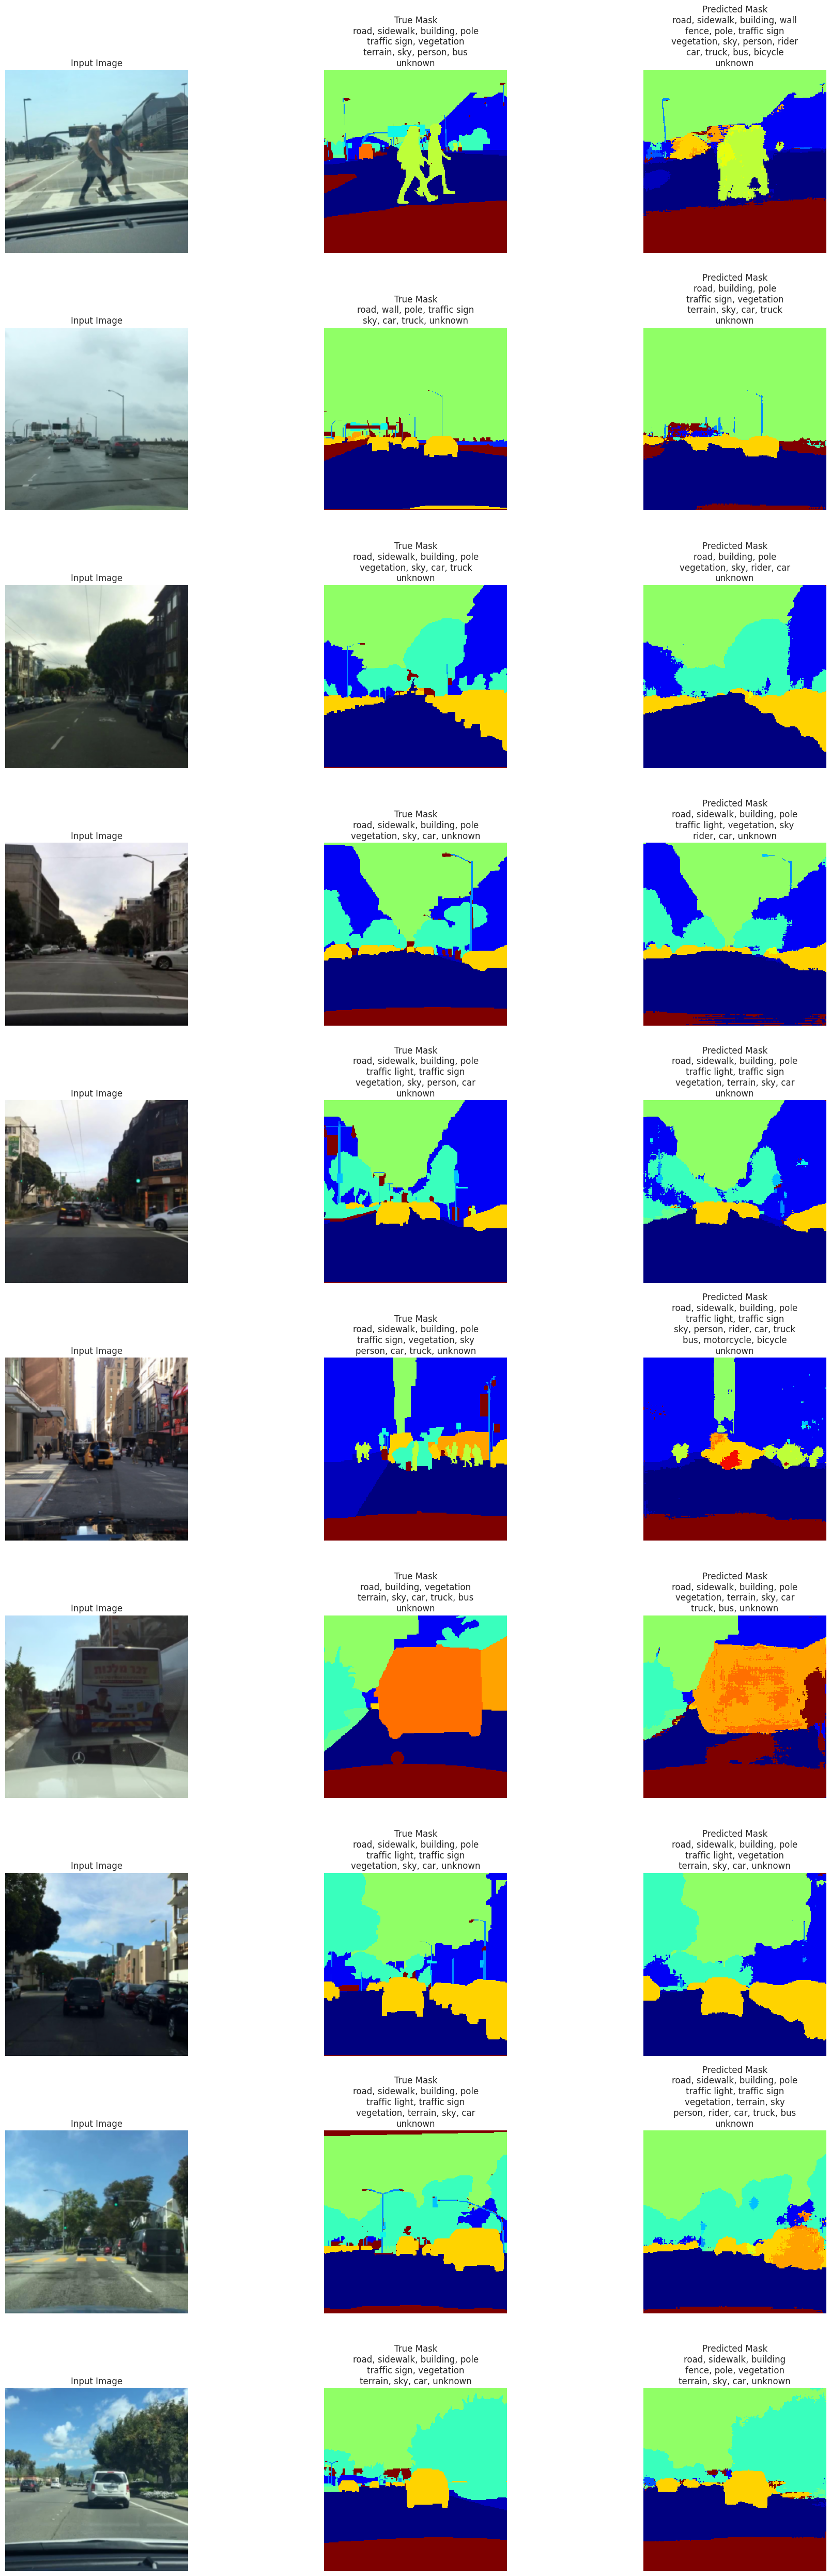

In [58]:
visualize_segmentation_batch(inputs, true_masks=targets, pred_masks=torch.argmax(decoded_preds, dim=1), vocab_dict=vocab_dict, num_imgs=10)

In conclusion, attempts to deal with the imbalance in the data using the loss function caused the model to indeed predict almost all the classes, but the general performance decreased and became a little noisy, this is probably because there is not enough data of the unrepresented classes to learn a clear pattern from it, which deteriorates the performance of the model in the rest as well The classes.